## Data Cleaning and Exploratory Analysis

First of all, let's load the dataset and look at its shape.

In [1]:
import pandas as pd

data = pd.read_csv('loan.csv')
print 'Size:', data.shape
data.head()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Size: (887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove rows with loan status is 'current' or 'issued'.

In [2]:
data = data[data['loan_status'] != 'Current']
data = data[data['loan_status'] != 'Issued']
print 'Size:', data.shape
data.head()

Size: (277140, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import numpy as np

loan_statuses_names = np.unique(np.array(data['loan_status']))

We see, that there are a lot of columns that have NaN values, we need to somehow deal with that. 

Let's explore what columns have NaN values.

In [4]:
is_null_column = pd.isnull(data).any()
pd.DataFrame(is_null_column[is_null_column == True].index, columns=['Column name'])

,Column name
0,emp_title
1,annual_inc
2,desc
3,title
4,delinq_2yrs
5,earliest_cr_line
6,inq_last_6mths
7,mths_since_last_delinq
8,mths_since_last_record
9,open_acc


As we see, quite a lot of columns have NaN values. Let's see what percentage of values is NaN.

In [5]:
import numpy as np

print round(100 * pd.isnull(data).values.sum() / float(data.shape[0] * data.shape[1]), 1)

29.2


As we see, a large amount of data is missing. We would need to deal with that later, when we use some model to do prediction. For now, let's keep them.

Some columns represent dates. We need to manually specify that types of these columns are date.

In [6]:
for date_column in ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']:
    data[date_column] = pd.to_datetime(data[date_column], format='%b-%Y')

Let's now look at distributions of values in each column. 

As a start, let's draw a histogram for each column and then dig into features that are the most interesting/representative.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999; // Prevent ipython from suppresing output.

<IPython.core.display.Javascript object>

We'll start by looking at numerical features.

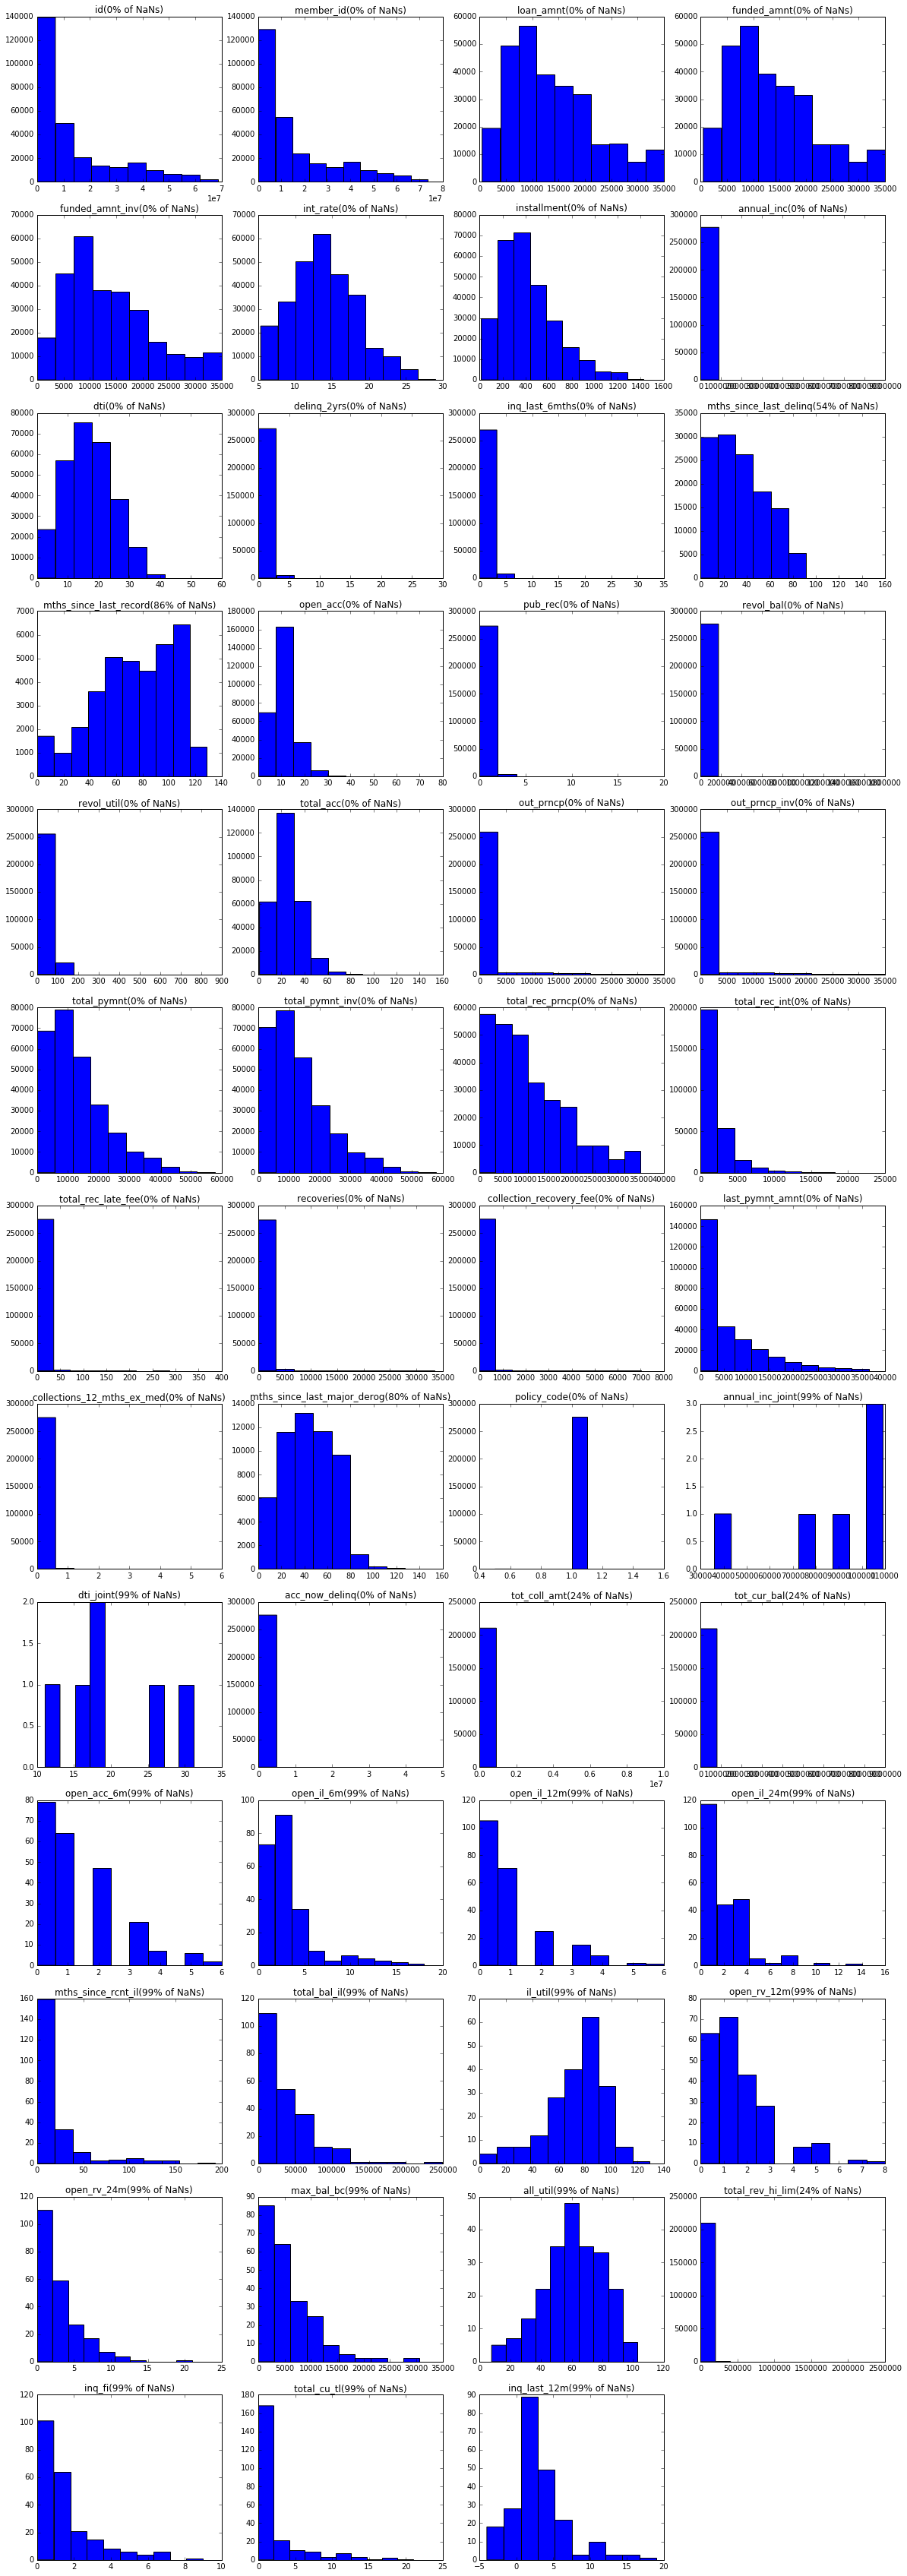

In [9]:
idx = 0
i = 1

plt.figure(figsize=(20, 60))
plt.subplots_adjust(hspace=0.2, wspace=0.2)

for column in data.columns:
    nonull_rows = data[column].notnull()
    nan_percentage = 100 * (1 - np.sum(nonull_rows) / float(data.shape[0]))
    if (data.dtypes[idx] == np.int64 or data.dtypes[idx] == np.float64):
        ax = plt.subplot(13, 4, i)
        
        plt.title(column + '(' + str(int(nan_percentage)) + '% of NaNs)');
        ax.hist(data[column][nonull_rows]);
        i += 1
    idx += 1
plt.show()

We can see, that number of features have nice distribution. 

On the other hand, some features mostly contain a single value - those would probably be not informative. But there are outliers that need to be kept in mind.

Next, we'll plot categorical features to look at their distributions.

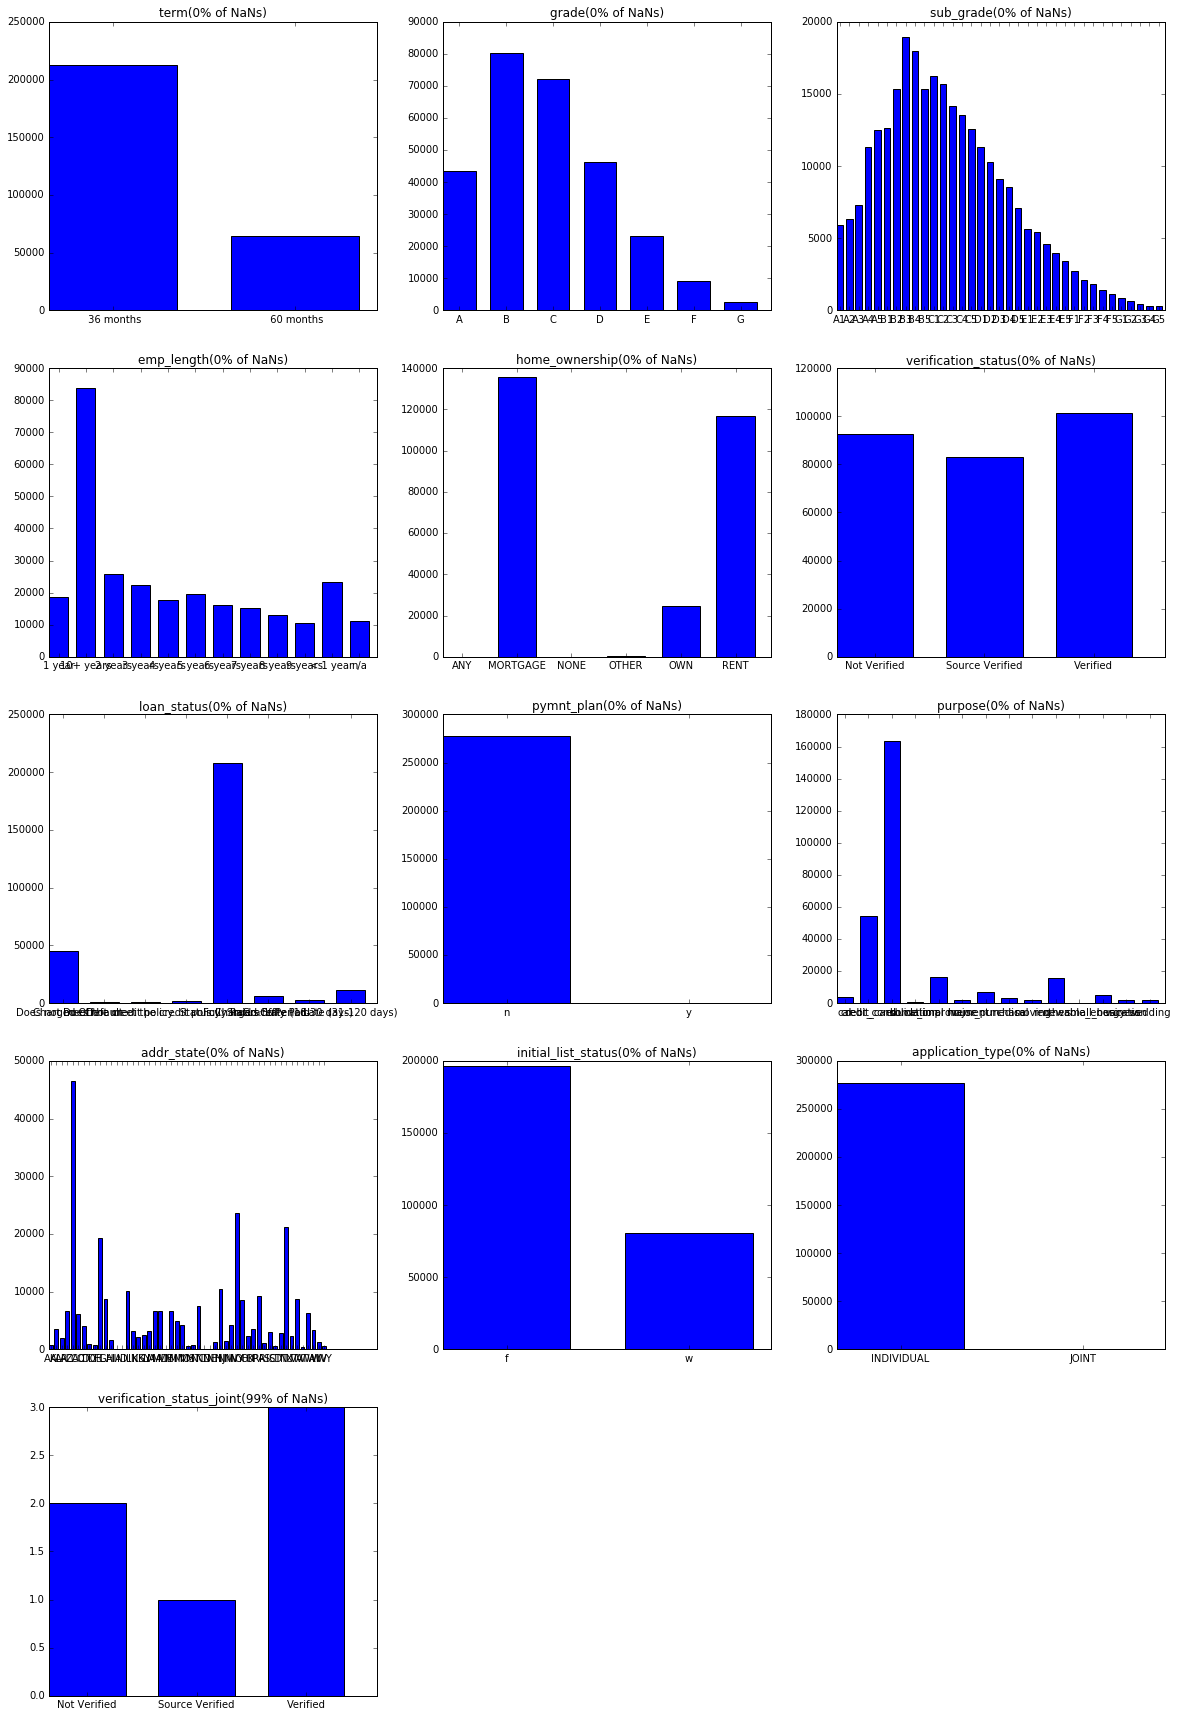

In [10]:
idx = 0
i = 1

plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.2, wspace=0.2)

count_threshold = 100 # If column contains more than 100 unique elements we won't plot it.

for column in data.columns:
    nonull_rows = data[column].notnull()
    nan_percentage = 100 * (1 - np.sum(nonull_rows) / float(data.shape[0]))
    column_data = data[column][nonull_rows]
    if ((data.dtypes[idx] == object) and (len(np.unique(column_data)) < count_threshold)):
        ax = plt.subplot(5, 3, i)
        
        plt.title(column + '(' + str(int(nan_percentage)) + '% of NaNs)');
        
        unique_values = np.unique(column_data)
        counts = [np.sum(column_data == unique_values[j]) for j in range(len(unique_values))]
        
        width = 0.7
        plt.bar(np.arange(len(unique_values)), counts, width)
        ax.set_xticks(np.arange(len(unique_values)) + width / 2.0)
        ax.set_xticklabels(unique_values)
        i += 1
    idx += 1
plt.show()

As we're trying to predict loan status, let's look at it closer.

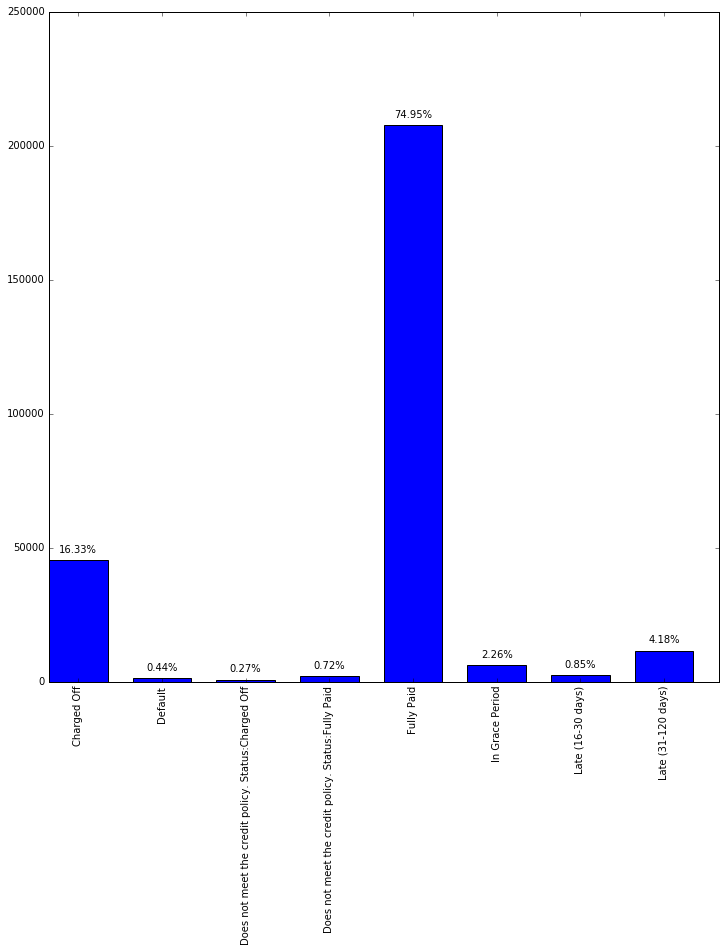

In [11]:
unique_values = np.unique(data['loan_status'])
counts = [np.sum(data['loan_status'] == unique_values[j]) for j in range(len(unique_values))]
width = 0.7
plt.figure(figsize=(12, 12))
rects = plt.bar(np.arange(len(unique_values)), counts, width);
plt.xticks(np.arange(len(unique_values)) + width / 2.0, unique_values, rotation='vertical');

ax = plt.gca()
for idx, rect in enumerate(rects):
    height = rect.get_height()
    perc = np.sum(data['loan_status'] == unique_values[idx]) / float(data.shape[0])
    ax.text(rect.get_x() + rect.get_width()/2., height + 2000,'%.2f' % (perc * 100) + "%", ha='center', va='bottom')

As obvious from the plot, we the baseline solution for us is to predict "Fully Paid" state for each loan. That would give us ~75% accuracy.

Since there are so many features, we can't explore all of them. To find out what features are relevant, we'll train Random Forest classifier. It provides off-shelf feature importance mechanism that we'll use in order to understand what feaures are most relevant to prediction task. 

For simple random forest model, we'll perform one-hot-encoding on categorical features and change all NaNs to column means (or mode for categorical).

In [12]:
transformed_data = data.copy()
transformed_y = transformed_data['loan_status']
transformed_data.drop('loan_status', axis=1, inplace=True)

idx = -1

drop_columns = []

for column in transformed_data.columns:
    idx += 1
    isnull = np.where(transformed_data[column].isnull())[0]
    if len(isnull) == 0:
        if not (transformed_data.dtypes[idx] == np.float64 or \
            transformed_data.dtypes[idx] == np.int64 or \
            transformed_data.dtypes[idx] == object):
            drop_columns.append(column)
        continue
    if (transformed_data.dtypes[idx] == np.float64 or transformed_data.dtypes[idx] == np.int64):
        transformed_data.iloc[isnull, idx] = np.nanmean(transformed_data[column])
    elif transformed_data.dtypes[idx] == object:
        transformed_data.iloc[isnull, idx] = 'NaN'
    else:
        drop_columns.append(column)
transformed_data.drop(drop_columns, axis=1, inplace=True)

We drop all categorical columns that have > threshold_count unique values.

In [13]:
columns = transformed_data.columns[transformed_data.dtypes == object]
ohe_columns = filter(lambda x: len(np.unique(transformed_data[x])) < count_threshold, columns)
remove_columns = filter(lambda x: len(np.unique(transformed_data[x])) >= count_threshold, columns)


transformed_data.drop(remove_columns, axis=1, inplace=True)
transformed_data = pd.get_dummies(transformed_data, columns=ohe_columns)

Now we can train random forest to get feature importances.

Since the dataset is large, we'll take only 10% of it for speed purposes.

In [14]:
new_length = transformed_data.shape[0] / 10

indices = np.random.choice(transformed_data.shape[0], new_length)
transformed_data = transformed_data.iloc[indices, :]
transformed_y = transformed_y.iloc[indices]

To check whether we chose a representative sample from data, let's look at distribution of loan statuses in initial data and selected part of the data.

In [15]:
for status in np.unique(transformed_y):
    print status, round(100 * np.sum(transformed_y == status) / float(len(transformed_y)), 2), \
            round(100 * np.sum(data['loan_status'] == status) / float(data.shape[0]), 2)

Charged Off 16.39 16.33
Default 0.44 0.44
Does not meet the credit policy. Status:Charged Off 0.29 0.27
Does not meet the credit policy. Status:Fully Paid 0.7 0.72
Fully Paid 74.83 74.95
In Grace Period 2.15 2.26
Late (16-30 days) 0.95 0.85
Late (31-120 days) 4.27 4.18


That looks nice. Now we can train random forest.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=123), \
                           {}, cv=5)
grid_search.fit(transformed_data, transformed_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [17]:
print grid_search.best_score_

0.95395828823


As we can see, model already works great. At this points, it's not really clear whether we overfit the data (since we used KFold as a crossvalidation).

Let's plot feature importances to see what columns are most relevant to classification task.

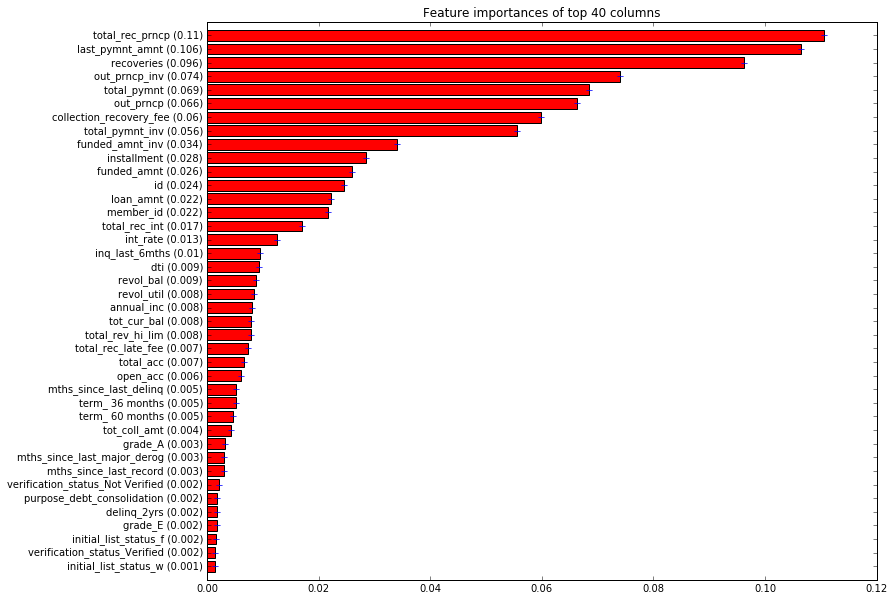

In [18]:
count = 40
clf = grid_search.best_estimator_
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:count][::-1]

plt.figure(figsize=(12, 10))
plt.title("Feature importances of top " + str(count) + " columns")
plt.barh(range(count), importances[indices],
       color="r", yerr=std[indices], align="center")

column_labels = [transformed_data.columns[idx] + ' (' + str(round(importances[idx], 3)) + ')' for idx in indices]

plt.yticks(range(count), column_labels)
plt.ylim([-1, count])
plt.show()

From the plot above, we see, that feature importances drop to zero quite rapidly. Only 30 features (in this simple model, we really need to be skeptical of it) contain useful information.

Let's dive more deeply into top importances found.

### out_prncp: Remaining outstanding principal for total amount funded

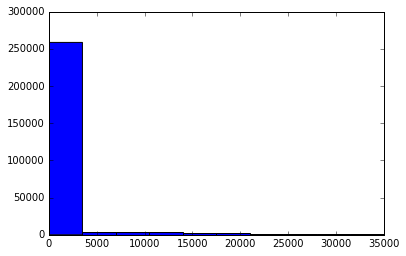

In [19]:
plt.hist(data['out_prncp']);

In [20]:
data['out_prncp'].describe()

count    277140.000000
mean        902.019451
std        3795.528665
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       35000.000000
Name: out_prncp, dtype: float64

Such exponential-like distributions are usually good to take log of.

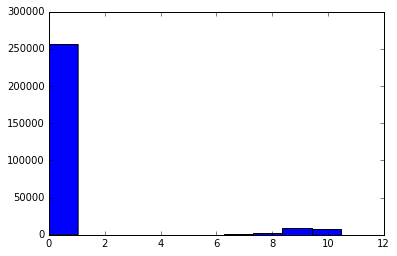

In [21]:
plt.hist(np.log(data['out_prncp'] + 1));

Now we see there's a gap between the data and hopefully that helps classifier to predict the outcome.

### out_prncp_inv: Remaining outstanding principal for total amount funded

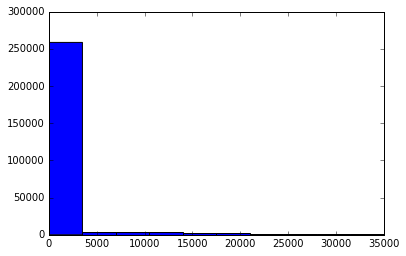

In [22]:
plt.hist(data['out_prncp_inv']);

This feature seems to highly correlate with out_prncp. Let's find it out.

In [23]:
loan_status_idx = data['loan_status'].copy()
unique_status = np.unique(loan_status_idx)
for idx, status in enumerate(unique_status):
    loan_status_idx.ix[loan_status_idx == status] = idx
data['loan_status_idx'] = loan_status_idx.astype(np.int32)

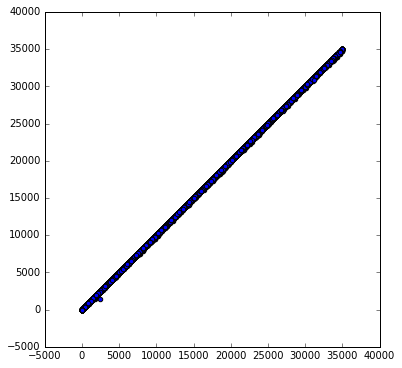

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(data['out_prncp'], data['out_prncp_inv'])

As you can see in the plot above, there's a strong linear correlation between these two features. Let's look at the residuals.

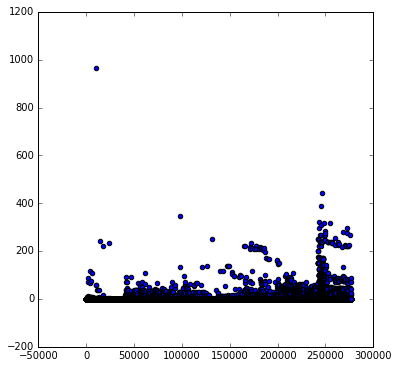

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(range(data.shape[0]), data['out_prncp'] - data['out_prncp_inv'])

We see, that out_prncp is always bigger that out_prncp_inv. We probably don't need both out_prncp_inv **and** out_prncp.

**But**, the difference between them can have information in it, so we'll add a column out_prncp_difference to our dataset.

Let's explore how out_prncp and out_prncp_inv relate to loan status.

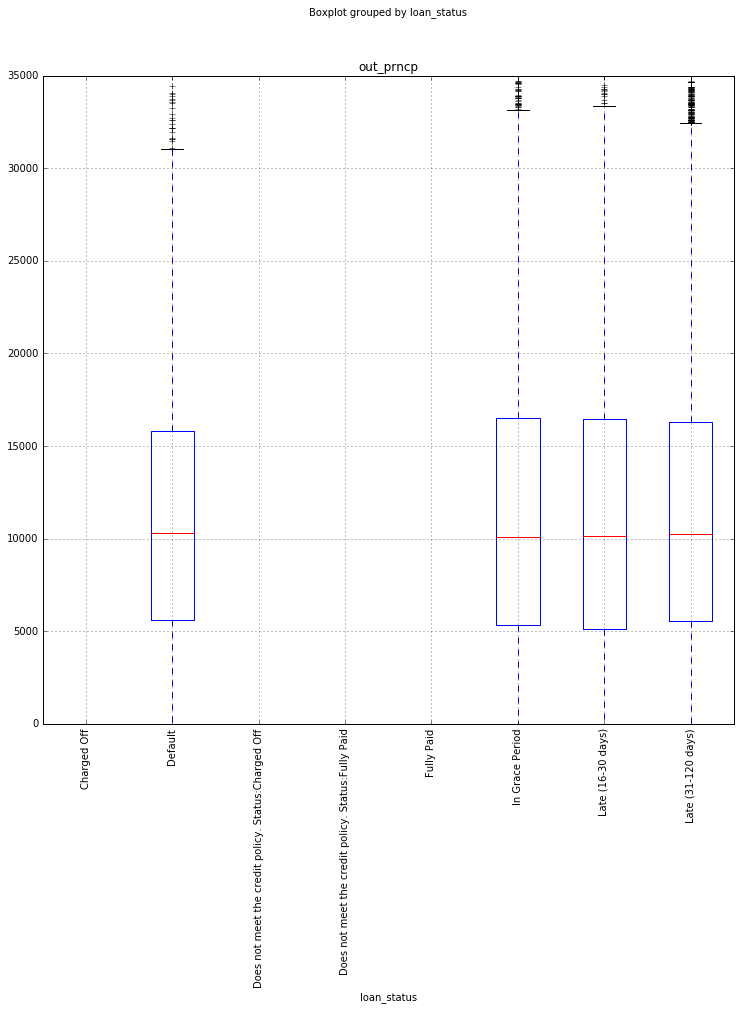

In [26]:
data.boxplot('out_prncp', 'loan_status', figsize=(12, 12));
plt.xticks(np.arange(len(loan_statuses_names)) + 1, np.unique(data['loan_status']), rotation='vertical');

We can immediately see, that "Charged Off", "Default", "Does not meet the credit policy Status: Charged Off" and "Does not meet the credit policy Status: Fully Paid" has very small values of column out_prncp.

Let's see whether there's a relationship between loan status and **difference** between out_prncp and out_prncp_inv.

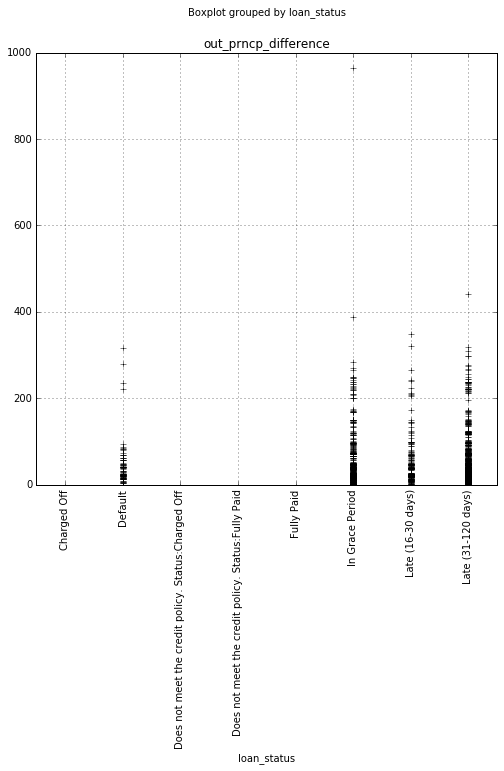

In [27]:
data['out_prncp_difference'] = data['out_prncp'] - data['out_prncp_inv']
data.boxplot('out_prncp_difference', 'loan_status', figsize=(8, 8));
plt.xticks(np.arange(len(loan_statuses_names)) + 1, np.unique(data['loan_status']), rotation='vertical');

It turned out to be just like previous plot - four loan statuses mentioned above differ from others.

### last_pymnt_amnt: Last total payment amount received

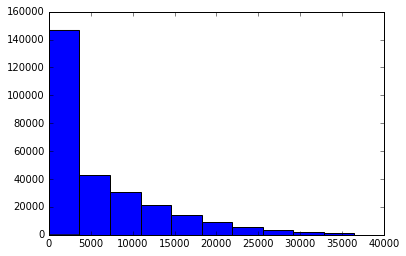

In [28]:
plt.hist(data['last_pymnt_amnt']);

We should probably also take log here.

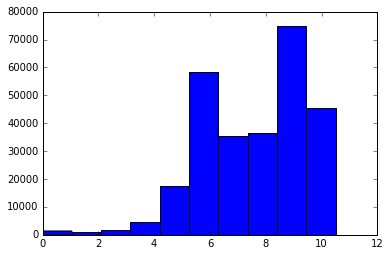

In [29]:
plt.hist(np.log(data['last_pymnt_amnt'] + 1));

As previously, let's look at the relationship between loan status and last payment amount.

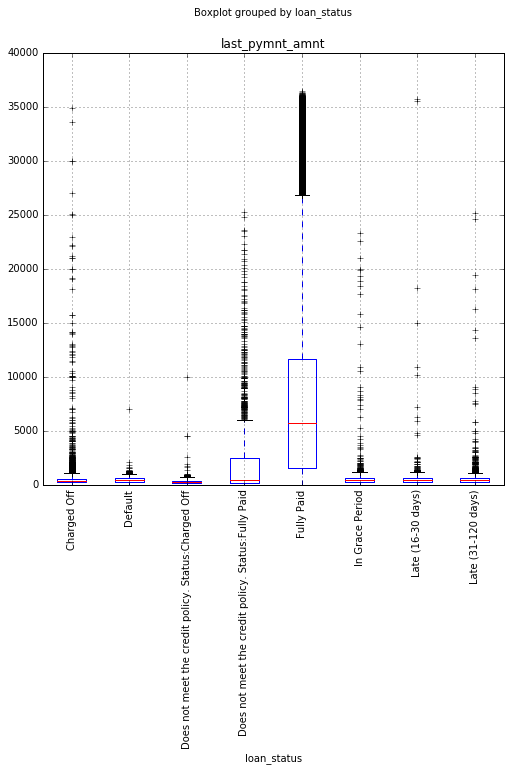

In [30]:
data.boxplot('last_pymnt_amnt', 'loan_status', figsize=(8, 8));
plt.xticks(np.arange(len(loan_statuses_names)) + 1, np.unique(data['loan_status']), rotation='vertical');

We see, that distribution are really different, that's why random forest can infer useful information from it. 

### Member Id

Now, that's really strange. RF found a relationship between unique Id for each person to loan outcome. 

That can be a sign that data came from different sources and in each source, there were different distributions of loan statuses. 

Let's further explore this fact.

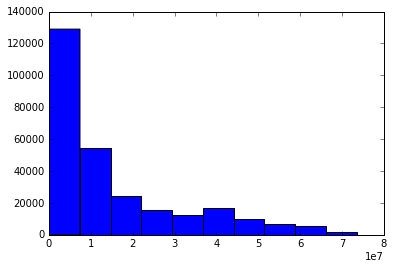

In [31]:
plt.hist(data['member_id']);

Member id is more or less uniform distributed. Let's see the distributions of member ids for each loan statuses.

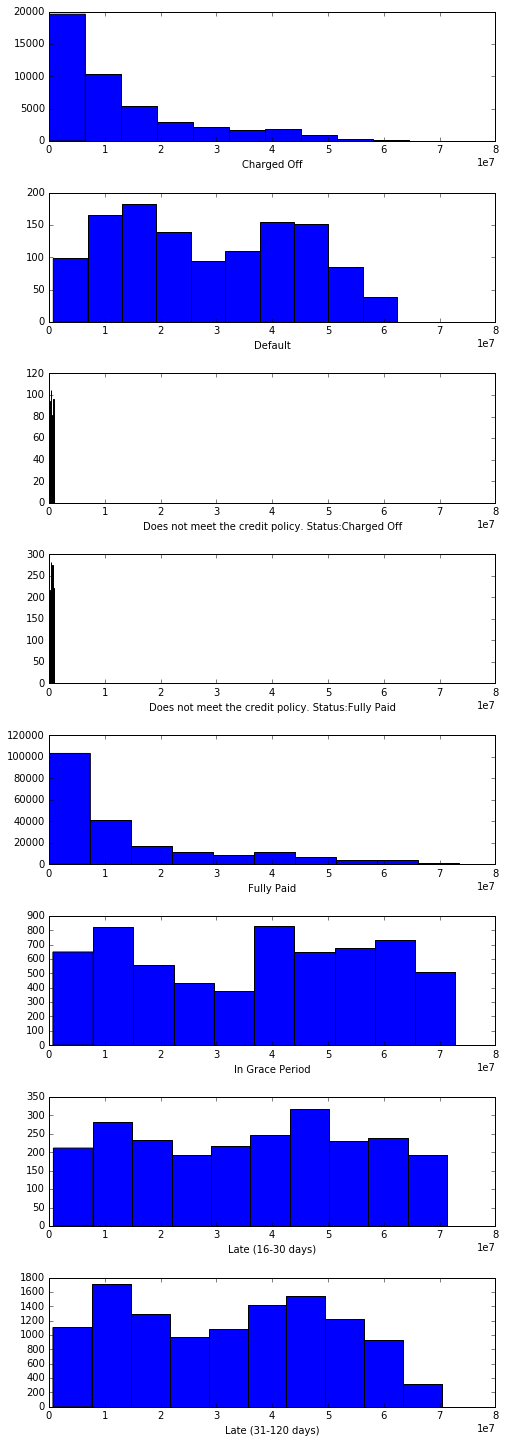

In [32]:
plt.subplots(len(loan_statuses_names), 1, figsize=(8, 25))
plt.subplots_adjust(hspace=0.4)

ax_prev = None

for idx, status in enumerate(np.unique(data['loan_status'])):
    if ax_prev is None:
        ax_prev = plt.subplot(len(loan_statuses_names), 1, idx + 1)
    else:
        ax_new = plt.subplot(len(loan_statuses_names), 1, idx + 1, sharex=ax_prev)
        ax_prev = ax_new
    status_data = data[data['loan_status'] == status]
    plt.hist(status_data['member_id']);
    plt.xlabel(np.unique(data['loan_status'])[idx])

We immediately see, that some IDs are very good indicator of some status. For example, status "Does not meet the credit policy. Status: Charged Off." can only be in people with memberId < $10^7$ or memberId > $6*10^7$.

This trend, the realionship between the outcome and ID is a data collection problem (maybe not a problem, but trait).

For prediction purposes we **shouldn't** consider such features, so we would remove that column in feature selection section!

### ID

We won't explore it, but it's likely that there's a similar relationship there.

We should remove this column.

### Other features

Previously, we ignored some features, that were not easy to add to our model: those include zip-code (too many values), all date-containing features, job title, url, loan description, loan title.

But they still can be relevant to prediction task. Concretely, we'll explore datetime data and zip-codes.

### Zip Code


Let's see the distribution of people over zip codes.

In [33]:
unique_values = np.unique(data['zip_code'])
counts = [np.sum(data['zip_code'] == unique_values[j]) for j in range(len(unique_values))]

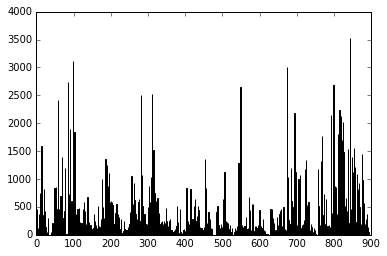

In [34]:
width = 0.7
plt.bar(np.arange(len(unique_values)), counts, width);

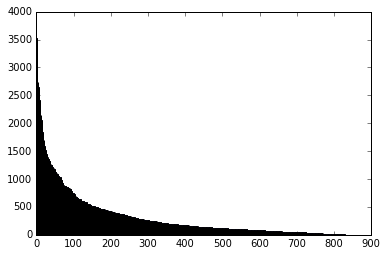

In [35]:
plt.bar(np.arange(len(unique_values)), sorted(counts, reverse=True), width);

We see, that there are a lot of zip-codes, that have more than 1000 people in there. That would allow us to make inference for each zip-code. 

On the other had, it seems that zip-code shouldn't influence much on loan status, so we wouldn't add it to final model.

### Datetime features

We have 5 features that contain date information.

In [36]:
date_columns = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
data[date_columns].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,earliest_cr_line
0,2011-12-01,2015-01-01,NaT,2016-01-01,1985-01-01
1,2011-12-01,2013-04-01,NaT,2013-09-01,1999-04-01
2,2011-12-01,2014-06-01,NaT,2016-01-01,2001-11-01
3,2011-12-01,2015-01-01,NaT,2015-01-01,1996-02-01
5,2011-12-01,2015-01-01,NaT,2015-09-01,2004-11-01


ML algorithms can't deal with date columns explicitly.

It's worth noting that information is mostly contained not in aboslute date values, but **differences** in them (i.e. how much time has passed between some actions). 

We won't plot graphs to explore that fact, but we'll add this differences (for each pair of dates) to our model.

In [37]:
data.drop('loan_status_idx', axis=1, inplace=True)

## Recap

After doing exploratory analysis, we did couple of observations and found some relationships, that are summarized here.

* There are a lot of missing values. Half of columns have some missing data. In total, 27.3% of the values is missing. Understanding how to deal with them correctly, needs expertise in the field, and much more time, so we'll perform the most common thing - change them into mean for numerical values and to 'NaN' string for categorical ones (that would be an individual category). 

* There are a number of categorical features. Since most ML algorithms can't deal with them, we performed One-Hot-Encoding to get numerical representations of them. It's worth noting, that this approach can only work on categorical features, that have small number of unique values. Here, some columns had many unique values (like zip-code, which has 935 unique values). We won't use them in our model.

* Distributions of some features are too skewed, so we need to take logarithm of them.

* The predictor can take 10 different values. But distribution of these values is not uniform, classes are skewed. That means, that depending on the task (real-world application), we would need other metrics than accuracy.

* Some columns are highly correlated. Usually that's not a problem since in all models we would have some regularization term, that would prevent bad influence of these correlations.

* We fit Random Forest model saw, that there are not many features that this model used to predict an outcome. Also, we explored top relevant features, and detected, that IDs had large impact on prediction. That's a type of overfitting and to avoid it we would remove that columnns.

## Feature Engineering

Mostly, this part relies on results that we got in data cleaning part.

Firstly, let's perform all the transformations that were mentioned in the previsious part.

### Separate target feature

We'll also convert it to numerical instead of categorical.

In [38]:
loan_status = data['loan_status'].copy()
data.drop('loan_status', axis=1, inplace=True)
unique_statuses = np.unique(loan_status)
for idx, status in enumerate(unique_statuses):
    loan_status[loan_status == status] = idx
loan_status = np.asarray(loan_status, dtype=np.int32)

### Remove ids columns

As described above, ids have nothing to do with loan status, so we need to drop them.

In [39]:
data.drop(['id', 'member_id'], axis=1, inplace=True)

### Deal with date columns

Instead of working the date columns, we would work with differences (in seconds) between each pair of dates.

In [40]:
for i in range(len(date_columns)):
    for j in range(i + 1, len(date_columns)):
        column_name = date_columns[i] + '_minus_' + date_columns[j]
        data[column_name] = pd.to_numeric(data[date_columns[i]]) - pd.to_numeric(data[date_columns[j]])
data.drop(date_columns, axis=1, inplace=True)

### out_prncp vs out_prncp_inv and total_pymnt vs total_pymnt_inv

As seen in exploratory analysis, those pairs of features are highly correlated. To retain information, we'll add new column as a difference between this correlated variables.

In [41]:
data['out_prncp_diff'] = data['out_prncp'] - data['out_prncp_inv']
data['total_pymnt_diff'] = data['total_pymnt'] - data['total_pymnt_inv']

data.drop(['out_prncp_inv', 'total_pymnt_inv'], axis=1, inplace=True)

### Deal with NaNs

For numerical columns, we'll change it to mean of that column. For categorical features, we'll create new category called 'NaN'.

In [42]:
idx = -1
drop_columns = []
for column in data.columns:
    idx += 1
    isnull = np.where(data[column].isnull())[0]
    if len(isnull) == 0:
        continue
    if (data.dtypes[idx] == np.float64 or data.dtypes[idx] == np.int64):
        data.iloc[isnull, idx] = np.nanmean(data[column])
    elif data.dtypes[idx] == object:
        data.iloc[isnull, idx] = 'NaN'

### Remove categorical columns with many values

In [43]:
count_threshold = 100
columns = data.columns[data.dtypes == object]
ohe_columns = filter(lambda x: len(np.unique(data[x])) < count_threshold, columns)
remove_columns = filter(lambda x: len(np.unique(data[x])) >= count_threshold, columns)

data.drop(remove_columns, axis=1, inplace=True)
data = pd.get_dummies(data, columns=ohe_columns)

### Take log of some features

Going back to graphs, showing distribution of features, we can select those ones, that we need to modify:

* annual_inc
* dti
* deling_2yrs
* inq_last_6mnths
* open_acc
* pub_rec
* revol_bal
* revol_util
* total_acc
* out_prncp
* total_pymnt
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_amnt
* collections_12_mths_ex_med
* annual_inc_joint
* acc_now_delinq
* tot_coll_amt
* tot_cur_bal
* open_acc_6m
* open_il_6m
* open_il_12m
* open_il_24m
* mths_since_rcnt_il
* total_bal_il
* open_rv_12m
* open_rv_24m
* max_bal_bc
* total_rev_hi_lim
* inq_fi
* total_cu_tl

In [44]:
log_features = ['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', \
                'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', \
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', \
                'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', \
                'annual_inc_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', \
                'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', \
                'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'total_rev_hi_lim', \
                'inq_fi', 'total_cu_tl']

for feature in log_features:
    data[feature] = np.log(data[feature] + 1) 

### Random Forest model

Let's run random forest model one more time to get feature importances.

Now, instead of KFold we would use hold-out dateset to see whether model overfits.

In [45]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, loan_status, test_size=0.3, random_state=123)

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

Now we'll compute accuracy of prediction of test set.

In [47]:
from sklearn.metrics import accuracy_score

y_test_predicted = rf_model.predict(X_test)

print accuracy_score(y_test, y_test_predicted)

0.979360611965


We see, that accuracy increased even more (0.95 -> 0.979).

Let's look at importances for this model.

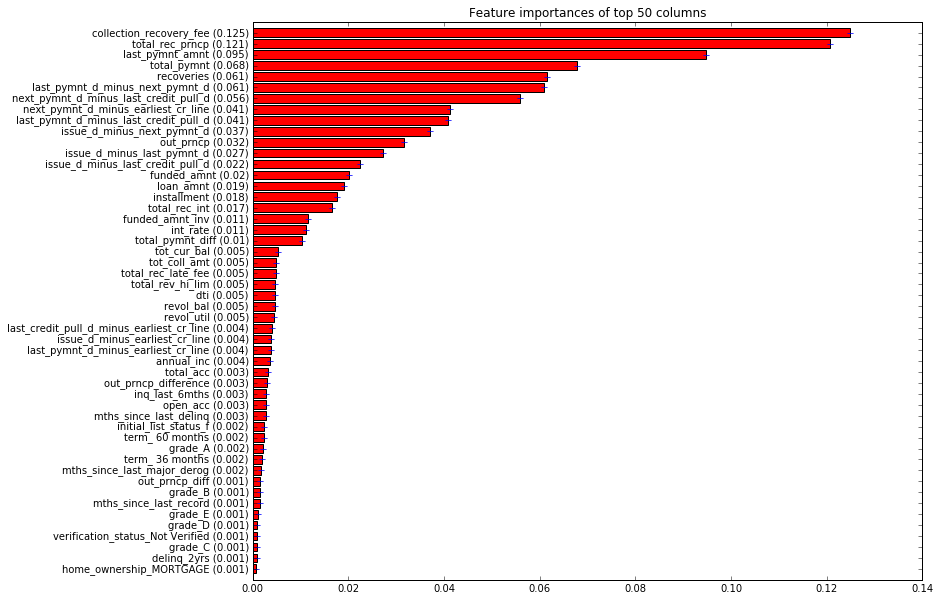

In [48]:
count = 50
importances = rf_model.feature_importances_
std = np.std([rf_model.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:count][::-1]

plt.figure(figsize=(12, 10))
plt.title("Feature importances of top " + str(count) + " columns")
plt.barh(range(count), importances[indices],
       color="r", yerr=std[indices], align="center")

column_labels = [data.columns[idx] + ' (' + str(round(importances[idx], 3)) + ')' for idx in indices]

plt.yticks(range(count), column_labels)
plt.ylim([-1, count])
plt.show()

Now, the relevant features include data features we added. So they indeed had a lot of information on loan status.

### Recursize feature elimination

As seen from RF model, there are not more than 50 features, that contain useful information.

Let's use that fact (concretely, number 50) to run [RFE](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) on random forest and see what feature it selects. 

In [49]:
from sklearn.feature_selection import RFE

estimator = RandomForestClassifier(n_estimators=10, random_state=123)
selector = RFE(estimator, count, 0.2)

selector.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
  estimator_params=None, n_features_to_select=50, step=0.2, verbose=0)

### Summizing

So, we proposed two methods to do feature selection. To make sure they both select relevant features, let's look at how many features did they both have. 

In [50]:
rfe_indices = np.where(selector.support_)[0]
rf_indices = np.argsort(rf_model.feature_importances_, )[::-1][:count]

both_indices = np.array(list(set(rfe_indices).intersection(set(rf_indices))))
any_indices = np.array(list(set(rfe_indices).union(set(rf_indices))))

print len(both_indices)
print len(any_indices)

48
52


We see, that these two method got most of the features both. Since feature selection is just a set of heurustics, we'll assume that both of these approaches got relevant features and we will take all features they propose. That will give us 52 features in total.

In [51]:
data = data[any_indices]

### Normalization

As a final transofmation, we'll normalize each column of dataset, so that each feature has value between 0 and 1.

In [52]:
data = data.values
differences = np.max(data, axis=0) - np.min(data, axis=0)
for col_id in range(data.shape[1]):
    if differences[i] < 1e5:
        data[:, i] -= np.min(data[:, i])
        data[:, i] /= differences[i]
    else:
        data[:, i] -= np.min(data[:, i])

## Predict Default Rate

First of all, we have a lot of data to deal with, to select the model, we would only use a part of dataset - random 10%. If some algorithms would both have high accuracy, we would train them on whole dataset.  

We will try following models:

* KNN
* Random Forest
* Decision Tree
* Logistic Regression 
* SVM (Linear and non-linear)
* AdaBoost
* Gradient Boosting

Each of them has its own hyperparameters to tune. We will use grid search with 5-fold crossvalidation to find most appropriate set of parameters. After that, we'll test the model on test dataset, that contains 30% of the whole data. That would make results more stable and representative.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, loan_status, test_size=0.3, random_state=123)

train_size = X_train.shape[0]
part_percentage = 0.1
X_train_part = X_train[:int(train_size * part_percentage), :]
y_train_part = y_train[:int(train_size * part_percentage)]

In [54]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

In [55]:
def test_score(estimator):
    preds = estimator.predict(X_test)
    return accuracy_score(y_test, preds)

### KNN

Here we need to tune number of neighbors to use for prediction.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors' : np.arange(1, 10)
}

grid = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=5)
grid.fit(X_train_part, y_train_part)
print 'Score:', grid.best_score_
print 'Params:', grid.best_params_
print 'Hold-out score:', test_score(grid.best_estimator_)
knn = grid.best_estimator_

Score: 0.804835300789
Params: {'n_neighbors': 9}
Hold-out score: 0.806932717519


### Random Forest

Random forest has more parameters to set: number of estimators, split criteria, maximum features to account in each tree and max depth of each tree.

In [57]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators' : [10],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : np.arange(5, 25, 2)
}

grid = GridSearchCV(RandomForestClassifier(random_state=123), params, n_jobs=-1, cv=5)
grid.fit(X_train_part, y_train_part)
print 'Score:', grid.best_score_
print 'Params:', grid.best_params_
print 'Hold-out score:', test_score(grid.best_estimator_)
rf = grid.best_estimator_

Score: 0.974740966029
Params: {'max_features': 'sqrt', 'n_estimators': 10, 'criterion': 'gini', 'max_depth': 23}
Hold-out score: 0.976774674653


Once we found best parameters, let's see whether accuracy improves when we increase number of estimators.

In [58]:
scores = []
number_of_estimators = range(10, 100, 10)

for n_est in number_of_estimators:
    model = RandomForestClassifier(n_estimators=n_est, criterion='gini', max_features='sqrt', \
                                   max_depth=21, random_state=123)
    model.fit(X_train_part, y_train_part)
    scores.append(test_score(model))

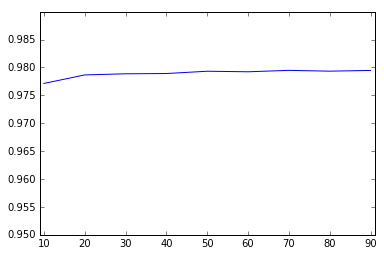

In [59]:
plt.plot(range(len(number_of_estimators)), scores);
plt.xticks(range(len(number_of_estimators)), number_of_estimators);
plt.ylim(ymin=0.95, ymax=0.99);
plt.xlim(xmin=-0.1, xmax=len(number_of_estimators) - 0.9);

The above plot looks like a straight line, so we can choose number of estimators equal to 10.

### Decision Tree

Decision tree seems rational here, since when predicion loan outcome we usually need to understand the underlying process of deciding. That's where decision trees are good at.

In [60]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2', None],
    'max_depth' : np.arange(10, 20)
}

grid = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1, cv=5)
grid.fit(X_train_part, y_train_part)
print 'Score:', grid.best_score_
print 'Params:', grid.best_params_
print 'Hold-out score:', test_score(grid.best_estimator_)
dtree = grid.best_estimator_

Score: 0.973967730295
Params: {'max_features': None, 'criterion': 'entropy', 'max_depth': 10}
Hold-out score: 0.975523802651


### Logistic Regression

Logistic regression is the first thing to try in classification task.

We'll use L2 regularization in order to prevent overfitting. 

In [61]:
from sklearn.linear_model import LogisticRegression

params = {
    'C' : np.logspace(-5, 3, 10)
}

grid = GridSearchCV(LogisticRegression(random_state=123), params, cv=5)
grid.fit(X_train_part, y_train_part)
print 'Score:', grid.best_score_
print 'Params:', grid.best_params_
print 'Hold-out score:', test_score(grid.best_estimator_)
logreg = grid.best_estimator_

Score: 0.7684932213
Params: {'C': 1.0000000000000001e-05}
Hold-out score: 0.769863606841


### Linear SVM

In [62]:
from sklearn.svm import LinearSVC

params = {
    'C' : np.logspace(-5, 3, 5),
    'loss' : ['hinge', 'squared_hinge']
}

grid = GridSearchCV(LinearSVC(random_state=123), params, cv=5)
grid.fit(X_train_part, y_train_part)
print 'Score:', grid.best_score_
print 'Params:', grid.best_params_
print 'Hold-out score:', test_score(grid.best_estimator_)
linearsvc = grid.best_estimator_

Score: 0.506005464199
Params: {'loss': 'hinge', 'C': 1.0000000000000001e-05}
Hold-out score: 0.767217531452


### Non-linear SVM

SVM allows to use kernels, so that the classification task is solved in high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. 

Here we use the most popular RBF kernel.

In [63]:
# from sklearn.svm import SVC

# params = {
#     'C' : np.logspace(-5, 3, 5),
#     'gamma' : np.logspace(-5, 3, 5)
# }

# grid = GridSearchCV(SVC(random_state=123), params, cv=5)
# grid.fit(X_train_part, y_train_part)
# print 'Score:', grid.best_score_
# print 'Params:', grid.best_params_
# print 'Hold-out score:', test_score(grid.best_estimator_)
# rbfsvc = grid.best_estimator_

KeyboardInterrupt: 

### AdaBoost

Boosting is one of the methods that can find very complex non-linear decision boundary. 

The first algorithm among boosting methods is adaboost. 

In [64]:
from sklearn.ensemble import AdaBoostClassifier

params = {
    'n_estimators' : range(10, 60, 10)
}

grid = GridSearchCV(AdaBoostClassifier(random_state=123), params, cv=5)
grid.fit(X_train_part, y_train_part)
print 'Score:', grid.best_score_
print 'Params:', grid.best_params_
print 'Hold-out score:', test_score(grid.best_estimator_)
adaboost = grid.best_estimator_

Score: 0.842517655549
Params: {'n_estimators': 20}
Hold-out score: 0.892112289817


### Gradient Boosting

Gradient boosting represents more general approach. It's usually more powerful than AdaBoost.

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators' : range(10, 60, 10)
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=123), params, cv=5)
grid.fit(X_train_part, y_train_part)
print 'Score:', grid.best_score_
print 'Params:', grid.best_params_
print 'Hold-out score:', test_score(grid.best_estimator_)
gradboost = grid.best_estimator_

Score: 0.977627712769
Params: {'n_estimators': 50}
Hold-out score: 0.979721440427


We'll save all the models so that we don't need to refit them.

In [66]:
import joblib
_ = joblib.dump(knn, 'knn_part.joblib', compress=3)
_ = joblib.dump(rf, 'rf_part.joblib', compress=3)
_ = joblib.dump(dtree, 'dtree_part.joblib', compress=3)
_ = joblib.dump(logreg, 'logreg_part.joblib', compress=3)
_ = joblib.dump(linearsvc, 'linearsvc_part.joblib', compress=3)
# _ = joblib.dump(rbfsvc, 'rbfsvc_part.joblib', compress=3)
_ = joblib.dump(adaboost, 'adaboost_part.joblib', compress=3)
_ = joblib.dump(gradboost, 'gradboost_part.joblib', compress=3)

This part loads models from file. Uncomment if you already trained models.

In [ ]:
# import joblib
# knn = joblib.load('knn_part.joblib')
# rf = joblib.load('rf_part.joblib')
# dtree = joblib.load('dtree_part.joblib')
# logreg = joblib.load('logreg_part.joblib')
# linearsvc = joblib.load('linearsvc_part.joblib')
# rbfsvc = joblib.load('rbfsvc_part.joblib')
# adaboost = joblib.load('adaboost_part.joblib')
# gradboost = joblib.load('gradboost_part.joblib')

## Model Comparison and Evaluation

Now, we have all this models trained. There are number of parameters that influence model:

* Speed (training and prediction time)
* Memory consumption
* Metrics score
* Interpretability 


1. **Speed**

    Since this report was created, all proposed models can be built in a reasonable time on a single machine. As for testing time, all provided models (except for KNN) are much quicker to test then train, so it's also affordable. 
    
2. **Memory**

    Number of parameters of each model (except for KNN) is very small compared to size of dataset, so after training it consumes very little memory.
    
3. **Metrics score**

    That is the main characteristic of the model. All others are just binary criterias - we won't take a model if it doesn't fit any of them. Among all models that satisfy all other criterias, we pick the model with highest metrics score.
    
    For each real problem we create own metrics to optimize. Usually, you choose it to optimize money. Since this we don't have background expertice in loan prediction, we propose two choices of metrics:
    
    * Accuracy. That means we conider all examples are weighted equally. That is usually not true, and it's not true in our problem, so that is not the best metric to choose.
    
    * F1-score. This metric account for class imbalance. As seen before, some classes have small number of examples. That gives the efffect that each class is weighted inverse proportional to class size. This metric is also not designed to this task. Though it would give more reasonable results, since we'll penalize for not paying attention to some class,

4. **Interpretability**
    
    In loan prediction task, it would be great if human can evaluate the model and see how it makes its decisions, so that he could find maybe unreasonable decicsions/logic in algorithm's thinking. Not all the models provide a nice interpretation.
    
5. **Variance**

    How much different can results be when we train an algorithm mulitple times. That gives us the confidence about the prediction. We prefer variance to be small, but there's a bias-variance tradeoff.

As final metrics we'll take F1 score. We'll also plot confusion matrix to understand where algorithm makes mistakes.

Let's now evaluate each algorithm and choose the best one to our task.

In [67]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

def evaluate_model(classifier):
    preds = classifier.predict(X_test)
    
    plt.figure(figsize=(12, 6))
    bins = np.arange(len(loan_statuses_names) + 1) - 0.5
    rects = plt.hist(preds, bins)
    plt.xticks(np.arange(len(loan_statuses_names)), loan_statuses_names, rotation='vertical')
    plt.xlim([-1, len(loan_statuses_names)])
    
    ax = plt.gca()
    for i in range(len(loan_statuses_names)):
        h = np.sum(preds == i)
        ratio = h / float(len(preds))
        ax.text(i, h + 1000,'%.1f' % (ratio * 100) + "%", ha='center', va='bottom')
    
    plt.show()
    
    print 'F1 score:', f1_score(y_test, preds, average='weighted')
    
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, preds))
    conf_matrix.columns = loan_statuses_names
    
    conf_matrix.index = loan_statuses_names
    
    conf_matrix.columns.name = 'Predicted Label'
    conf_matrix.index.name = 'True Label'
    
    
    scaled_conf = conf_matrix.copy()
    scaled_conf = scaled_conf.div(scaled_conf.sum(axis=1), axis=0)
    sn.heatmap(scaled_conf, annot=True)

    return conf_matrix
    

### KNN

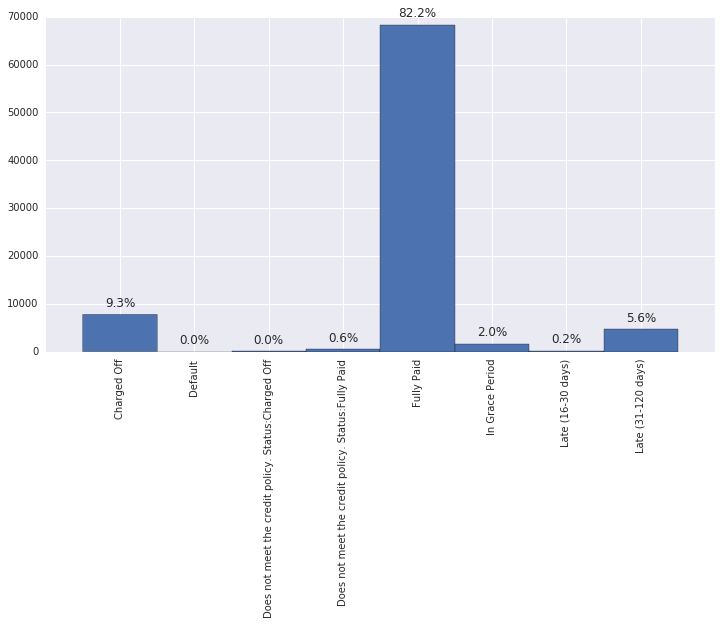

F1 score: 0.785665041471


Predicted Label,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
True Label,,,,,,,,
Charged Off,4362,0,0,0,9119,0,0,0
Default,2,2,0,5,4,46,2,307
Does not meet the credit policy. Status:Charged Off,0,2,25,99,2,18,2,78
Does not meet the credit policy. Status:Fully Paid,0,1,12,332,18,73,4,121
Fully Paid,3397,0,0,0,59136,0,0,0
In Grace Period,0,0,0,24,22,634,41,1163
Late (16-30 days),0,1,0,12,8,211,30,439
Late (31-120 days),3,5,1,60,29,663,58,2569


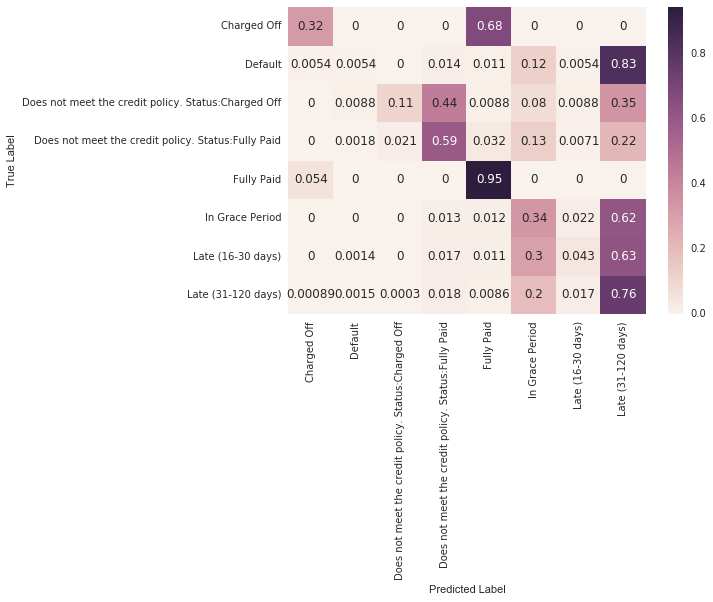

In [68]:
confusion = evaluate_model(knn)
confusion

We see, that even the simplest classification model gives us reasonable score. Let's  look at model parameters:

- Memory: Knn needs to store all dataset to make predictions. This dataset is already large, so it can be impossible to use it in practice.
- Interpretability: the model has a nice interpretation: we can show nearest neighbors that affected the algorithm's decisions. These are people similar to person we're trying to predict. 
- Variance: this model highly depends on the exact dataset. For prediction we only take into account 7 neighbors, that's why it has high variance.
- F1-score: such score is a good start. To understand how good it is, we'll later compare them to other models.

### Random Forest

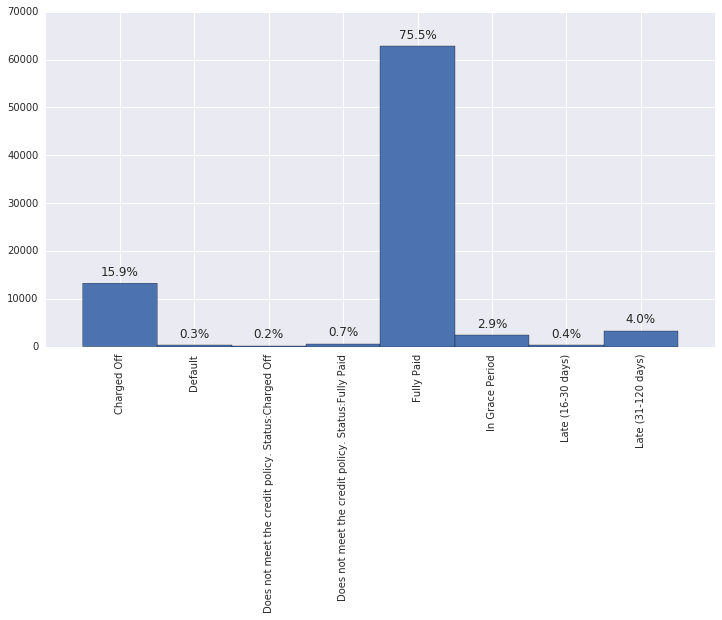

F1 score: 0.975957524321


Predicted Label,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
True Label,,,,,,,,
Charged Off,13225,0,0,0,256,0,0,0
Default,0,273,0,0,0,6,1,88
Does not meet the credit policy. Status:Charged Off,23,0,191,9,0,0,0,3
Does not meet the credit policy. Status:Fully Paid,0,0,1,552,3,5,0,0
Fully Paid,7,0,0,0,62526,0,0,0
In Grace Period,0,0,0,7,0,1486,166,225
Late (16-30 days),0,1,0,2,0,438,122,138
Late (31-120 days),0,7,0,3,0,473,69,2836


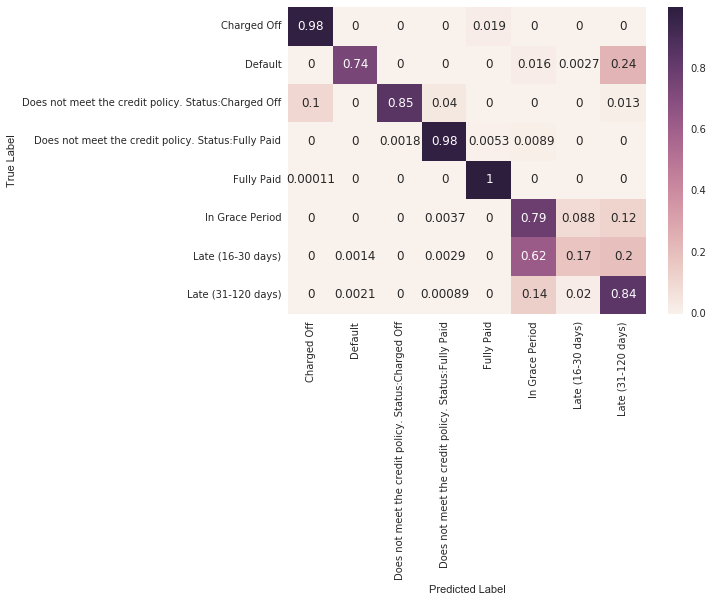

In [69]:
confusion = evaluate_model(rf)
confusion

- Memory: memory consumption is pretty small.
- Interpretability: since RF is an ensemble method, it combines a lot of decision trees together and that's why it's not well interpreted.
- Variance: Since we average a lot of predictions, variance for this method is low.
- Metrics score: as we see, random forest produces very high F1-score. 

### Decision Tree

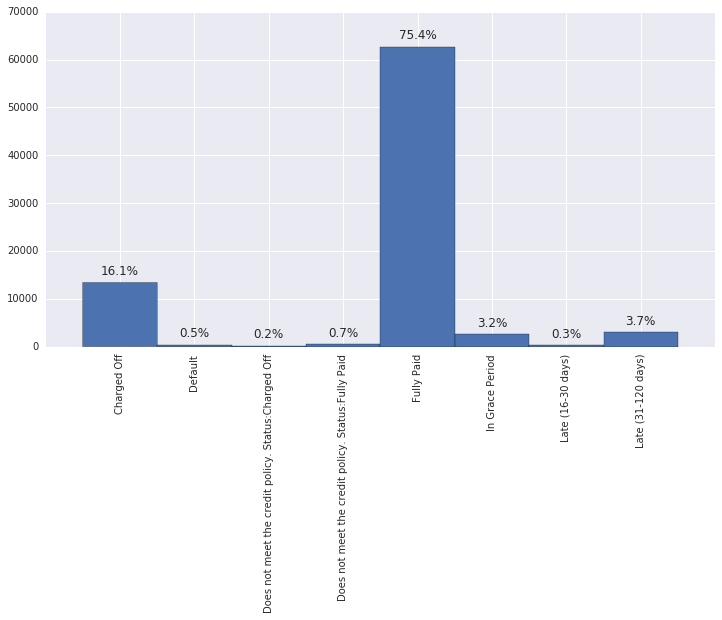

F1 score: 0.974489649672


Predicted Label,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
True Label,,,,,,,,
Charged Off,13177,0,0,0,304,0,0,0
Default,0,310,1,0,0,4,0,53
Does not meet the credit policy. Status:Charged Off,25,2,163,11,5,0,0,20
Does not meet the credit policy. Status:Fully Paid,1,0,5,543,12,0,0,0
Fully Paid,181,0,0,0,62352,0,0,0
In Grace Period,0,0,0,1,0,1689,36,158
Late (16-30 days),0,0,0,0,0,472,137,92
Late (31-120 days),1,66,0,0,0,486,99,2736


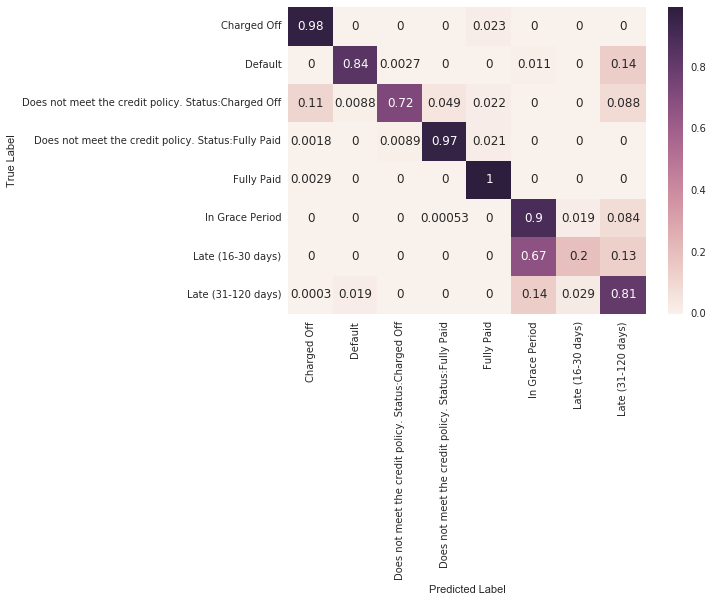

In [70]:
confusion = evaluate_model(dtree)
confusion

- Memory: memory consumption is pretty small.
- Interpretability: decision tree is great at understanding the underlying progress. We can see what decisions were made at each step of the algorithm.
- Variance: The exact tree shape highly depends on the training data. Even small changes can result into big changes in final model. This model has high variance.
- Metrics score: as we see, decision trees give us pretty high score. That means we can predict each person's loan status by "asking" series of questions about values of features.

### Logistic Regression

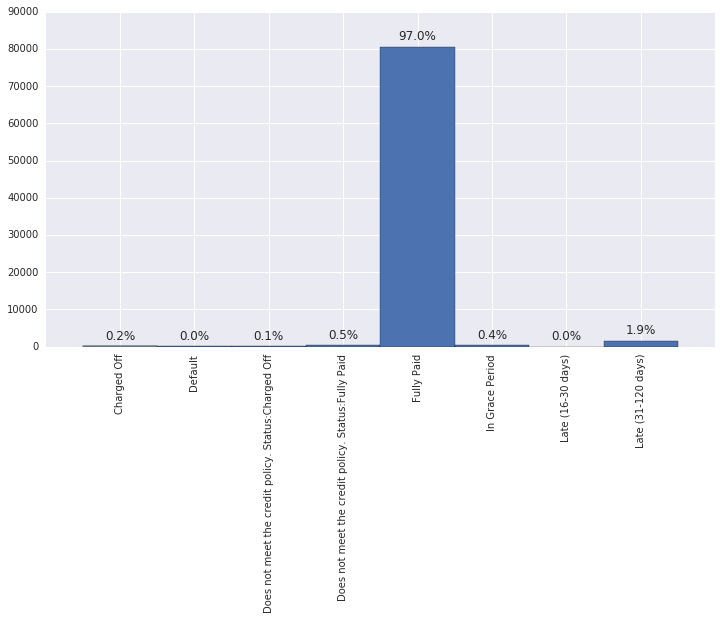

F1 score: 0.682856623982


/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted Label,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
True Label,,,,,,,,
Charged Off,150,0,0,1,13330,0,0,0
Default,1,9,0,2,253,3,0,100
Does not meet the credit policy. Status:Charged Off,2,12,61,9,135,0,0,7
Does not meet the credit policy. Status:Fully Paid,0,0,3,322,191,28,0,17
Fully Paid,31,0,0,1,62501,0,0,0
In Grace Period,4,0,0,6,1237,151,0,486
Late (16-30 days),4,0,0,2,529,25,0,141
Late (31-120 days),8,0,0,36,2433,97,0,814


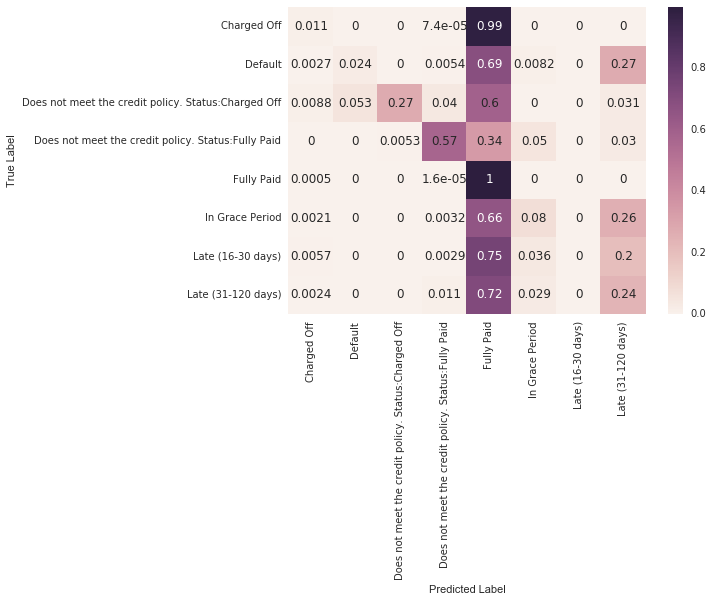

In [71]:
confusion = evaluate_model(logreg)
confusion

- Memory: memory consumption is pretty small.
- Interpretability: logistic regression is a linear method so we can nicely intepret it.
- Variance: linear models are known to have small variance, its results wouldn't very much.
- Metrics score: score is pretty low. That means that linear methods doesn't correctly describe the underlying relationship.

### Linear SVM

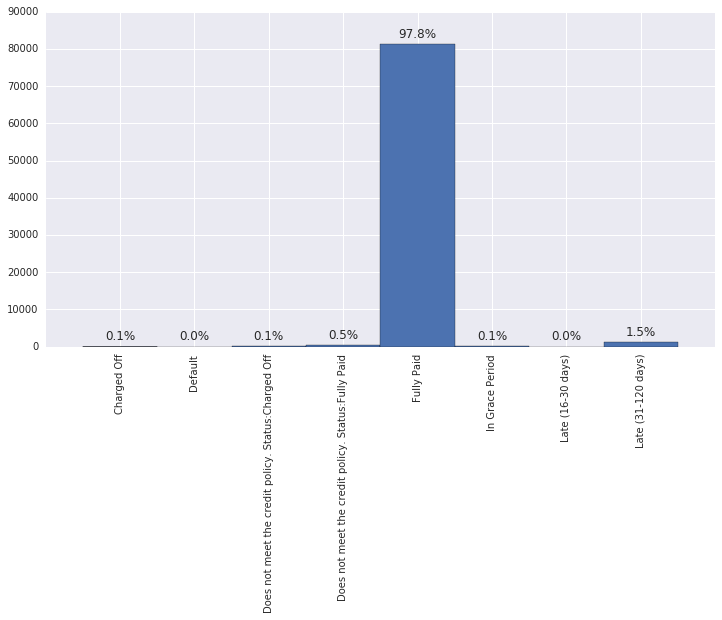

F1 score: 0.675461151271


Predicted Label,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
True Label,,,,,,,,
Charged Off,46,0,0,0,13435,0,0,0
Default,0,0,0,1,140,3,0,224
Does not meet the credit policy. Status:Charged Off,2,0,45,11,110,0,0,58
Does not meet the credit policy. Status:Fully Paid,0,0,1,316,227,9,0,8
Fully Paid,0,0,0,0,62533,0,0,0
In Grace Period,3,0,0,20,1730,41,0,90
Late (16-30 days),0,0,0,17,648,8,0,28
Late (31-120 days),5,0,0,29,2527,20,0,807


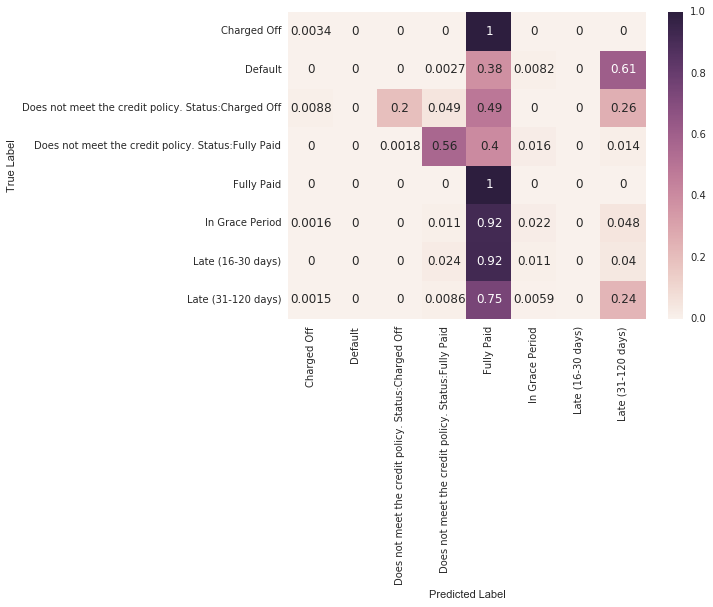

In [72]:
confusion = evaluate_model(linearsvc)
confusion

Analysis of this method is almost the same as for logistic regression. As we see, linear methods are bad for this task.

### Non-linear SVM

In [ ]:
# confusion = evaluate_model(rbfsvc)
# confusion

Such low F1-score shows that probably model parameters were not tuned nicely. 

I wasn't able to tune them more precisely because the complexity of training Non-linear SVM is $O(N^2 M)$, where N is number of samples and M - number of features. And that's too much for this size of dataset.

### AdaBoost

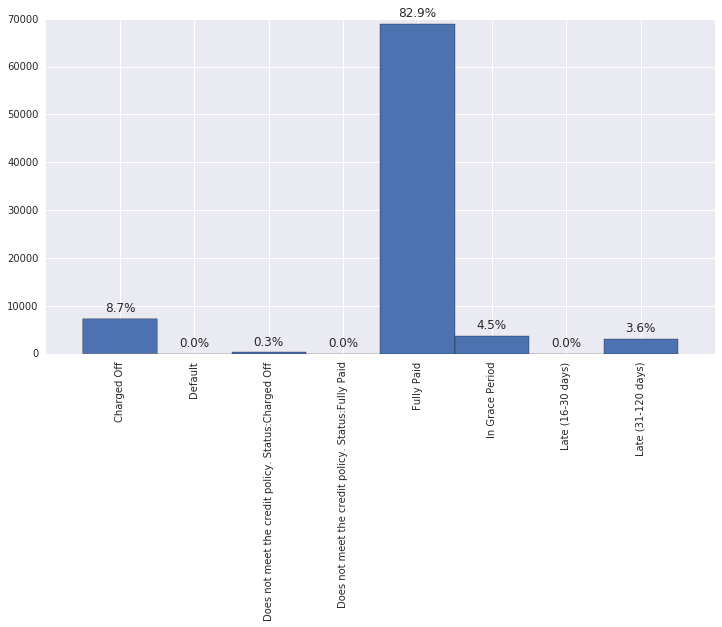

F1 score: 0.876037850907


Predicted Label,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
True Label,,,,,,,,
Charged Off,7142,0,0,0,6339,0,0,0
Default,0,0,0,0,1,4,0,363
Does not meet the credit policy. Status:Charged Off,111,0,104,0,9,2,0,0
Does not meet the credit policy. Status:Fully Paid,0,0,125,0,0,436,0,0
Fully Paid,0,0,0,0,62533,0,0,0
In Grace Period,0,0,0,0,0,1821,0,63
Late (16-30 days),0,0,0,0,0,669,0,32
Late (31-120 days),0,0,0,0,3,813,0,2572


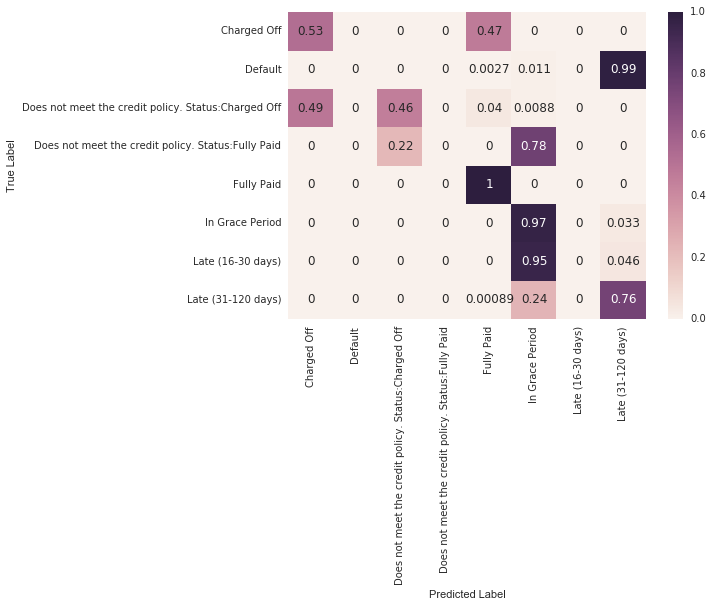

In [73]:
confusion = evaluate_model(adaboost)
confusion

AdaBoost has similar properties to Random Forest. The basic idea of combining weak classifiers is just the same. Apparently, Random Forest fits better here. Because other characteristics are similar, RF is for sure better for this task.

Also it can have high variance since it works poorly with outliers.

### Gradient Boosting

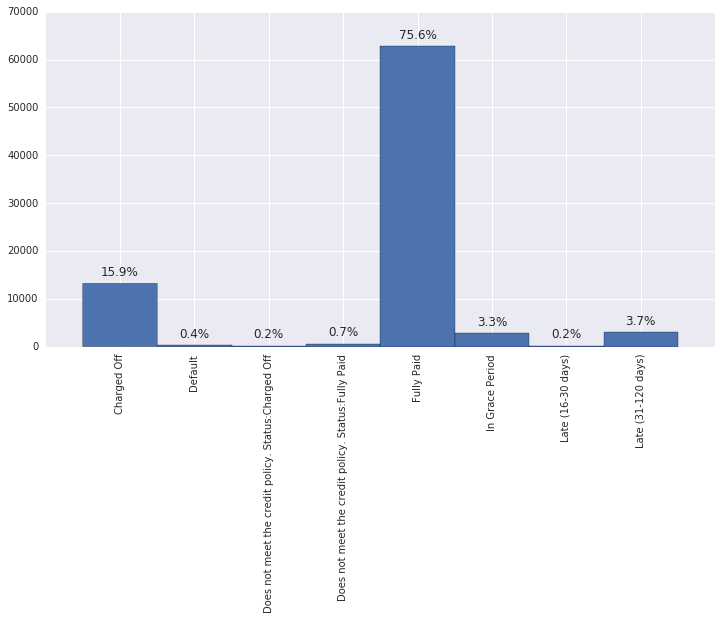

F1 score: 0.978459652915


Predicted Label,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
True Label,,,,,,,,
Charged Off,13184,0,0,0,297,0,0,0
Default,0,301,0,0,1,2,0,64
Does not meet the credit policy. Status:Charged Off,13,19,177,6,7,0,1,3
Does not meet the credit policy. Status:Fully Paid,0,0,1,560,0,0,0,0
Fully Paid,5,0,0,0,62528,0,0,0
In Grace Period,0,0,0,1,0,1773,34,76
Late (16-30 days),0,0,0,1,0,492,120,88
Late (31-120 days),3,14,0,1,4,502,51,2813


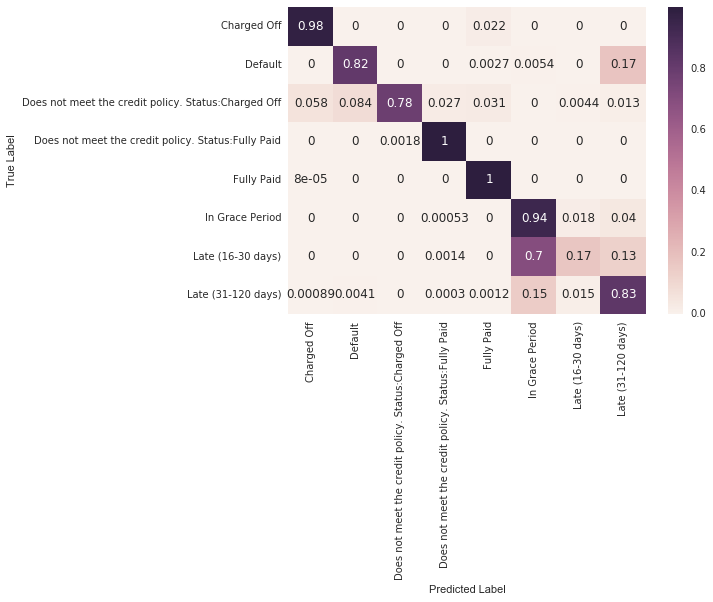

In [74]:
confusion = evaluate_model(gradboost)
confusion

GB is another to combining classifiers. It also lacks interpretability. 

But as we see, it has high F1 score, comparable to random forest model with makes it also possible for a best model.

## Results

The final choise of the model is not obvious. As stated above, it relies on the specific goal we want to accomplish.

For sure we need high accuracy and F1-score, so that leaves us with following models:

* Random Forest
* Decision Tree
* Gradient Boosting

Scores of these models are comparable one to another. But decision tree has the property that it's interpretable, that can be critical in this problem. Also, the training time for this model is lowest. 

I would choose decision tree as a final model.

To conclude, let's train it on the full train dataset and see the score.

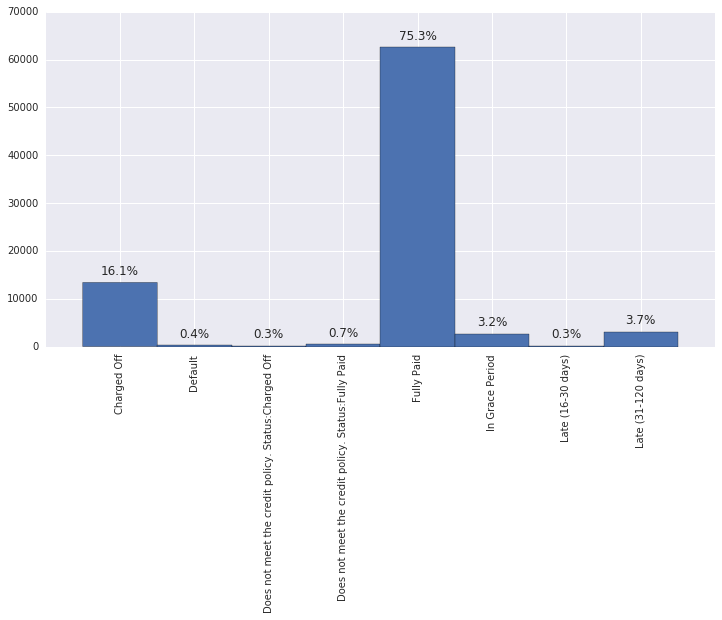

F1 score: 0.979399502858


Predicted Label,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
True Label,,,,,,,,
Charged Off,13256,0,0,0,225,0,0,0
Default,0,300,1,0,0,3,0,64
Does not meet the credit policy. Status:Charged Off,1,0,219,1,5,0,0,0
Does not meet the credit policy. Status:Fully Paid,0,0,0,559,2,0,0,0
Fully Paid,154,0,0,0,62379,0,0,0
In Grace Period,0,0,0,0,0,1781,1,102
Late (16-30 days),0,0,0,0,0,482,151,68
Late (31-120 days),1,17,1,0,0,424,69,2876


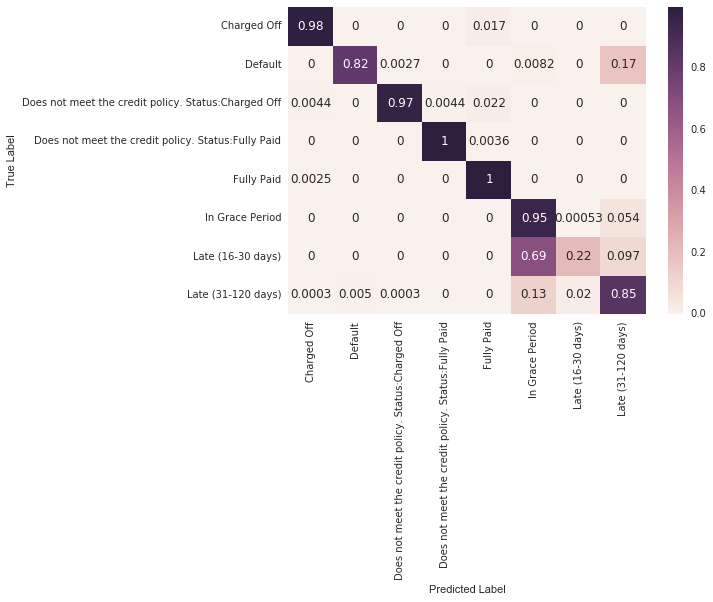

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtree_final = DecisionTreeClassifier(max_features=None, criterion='gini', max_depth=10)
dtree_final.fit(X_train, y_train)
confusion = evaluate_model(dtree_final)
confusion